# DCGAN for Celeba (pytorch lightning)

## Installation and download

In [3]:
!mkdir figures
!mkdir scripts
%cd /content/scripts
!wget -q https://raw.githubusercontent.com/probml/pyprobml/master/scripts/pyprobml_utils.py
!wget -q https://github.com/probml/probml-data/raw/main/checkpoints/dcgan-mish-noisy-instances-good.ckpt
!wget -q https://github.com/probml/probml-data/raw/main/data/2_image_in_latent_space.npy
!wget -q https://raw.githubusercontent.com/probml/pyprobml/master/scripts/lvm_plots_utils.py
!wget -q https://raw.githubusercontent.com/probml/pyprobml/master/scripts/dcgan_celeba_lightning.py
!wget -q https://raw.githubusercontent.com/sayantanauddy/vae_lightning/main/data.py

/content/scripts


In [2]:
%%capture
! pip install --quiet torchvision pytorch-lightning torchmetrics  torch test-tube lightning-bolts einops umap-learn

## Importing modules

In [4]:
import os
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from pytorch_lightning import LightningDataModule, LightningModule, Trainer
from torch.utils.data import DataLoader, random_split
from torch.utils.data import Dataset
from einops import rearrange
from tqdm import tqdm
from lvm_plots_utils import get_random_samples, get_grid_samples, get_imrange
from dcgan_celeba_lightning import DCGAN

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Defining the model

In [ ]:
m = DCGAN()
m.load_state_dict(torch.load("dcgan-mish-noisy-instances-good.ckpt"))
m.to(device)

DCGAN(
  (generator): DCGANGenerator(
    (gen): Sequential(
      (0): Sequential(
        (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Mish()
      )
      (1): Sequential(
        (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Mish()
      )
      (2): Sequential(
        (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Mish()
      )
      (3): Sequential(
        (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

## Sampling from a TN[0,1] distribution

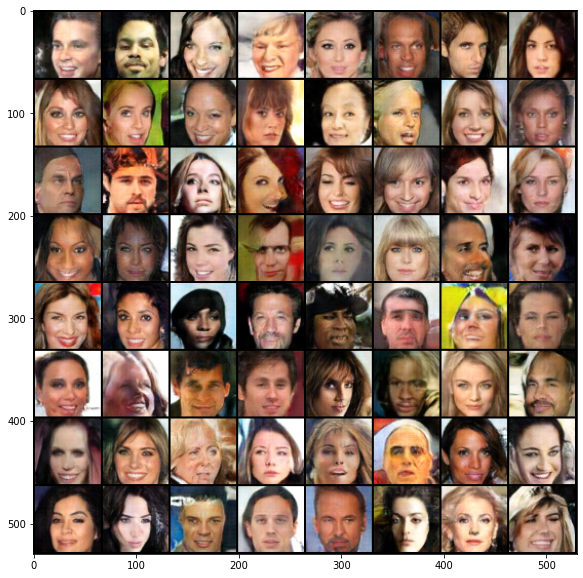

In [ ]:
plt.figure(figsize=(10, 10))
# Where 5 is the truncation threshold for our truncated normal distribution we are sampling from
imgs = get_random_samples(m, 5, 100)
plt.imshow(imgs)

## Intepolation

In [ ]:
start, end = np.load("2_image_in_latent_space.npy")
start, end = torch.tensor(start, device=device), torch.tensor(end, device=device)

### Spherical interpolation

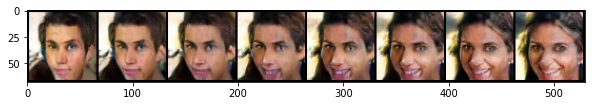

In [ ]:
def decoder(img):
    return rearrange(m(img), "b c h w -> (b c) h w")


plt.figure(figsize=(10, 100))
arr = get_imrange(decoder, start, end)
plt.imshow(arr)

### Linear interpolation 

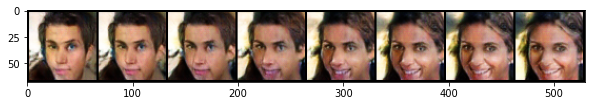

In [ ]:
def decoder(img):
    return rearrange(m(img), "b c h w -> (b c) h w")


plt.figure(figsize=(10, 100))
arr = get_imrange(decoder, start, end, interpolation="linear")
plt.imshow(arr)